# Act_Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
tt_final = pd.read_csv('twitter_archive_master.csv')

# Analysis


### Insights:
- Bottom 10 ratings including outliers
- Top 10 most frequently predicted breeds
- Top 10 most liked breeds on average

### Visualization:
- Looking for a correlation between Favorite count and retweet count

In [3]:
tt_final.describe()

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.615000e+03,1615.000000,1615.0,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1.615000e+03
mean,7.385300e+17,10.796904,10.0,0.105882,0.017337,0.206811,0.013622,0.332508,8772.652632,2531.517028,1.222910,0.610078,0.136582,6.054469e-02
std,6.796355e+16,1.775746,0.0,0.553738,0.262854,0.609164,0.115953,0.824968,11736.284295,3701.331679,0.584683,0.265814,0.101460,5.168124e-02
min,6.660209e+17,0.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,13.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,6.768432e+17,10.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,2063.500000,616.500000,1.000000,0.382227,0.054268,1.506560e-02
50%,7.117438e+17,11.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,4197.000000,1367.000000,1.000000,0.610573,0.121377,4.947150e-02
75%,7.922223e+17,12.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,11173.500000,3104.000000,1.000000,0.857867,0.197905,9.437495e-02
max,8.921774e+17,14.000000,10.0,3.000000,4.000000,2.000000,1.000000,4.000000,144041.000000,49489.000000,4.000000,0.999984,0.467678,2.710420e-01


This table already gives us an insight on the quantitative variables. The rating numerator descriptive stats are already quite informative, but let's investigate further.

### Bottom 10 ratings including outliers

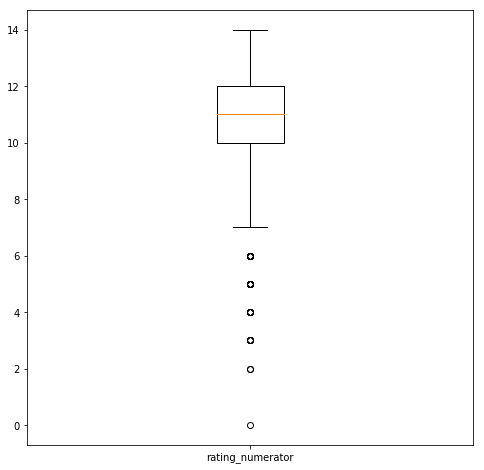

In [4]:
plt.figure(figsize=(8,8));
plt.boxplot(tt_final['rating_numerator'], labels=['rating_numerator']);

I wanted to investigate what was so special about the lowest scorer dogs. I will query the specific entries and look up the urls and the tweets.

In [6]:
top10 = tt_final.sort_values(['rating_numerator'], ascending=True,).head(10)
pd.options.display.max_colwidth = 120
top10[['expanded_urls', 'rating_numerator', 'text', 'all_p']]

,expanded_urls,rating_numerator,text,all_p
198,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116...",0,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,American_Staffordshire_terrier
1179,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible...,Maltese_dog
1530,https://twitter.com/dog_rates/status/667878741721415682/photo/1,2,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 ...,miniature_pinscher
770,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https:/...,Chihuahua
1483,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh...,pug
1307,https://twitter.com/dog_rates/status/673906403526995968/photo/1,3,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 ...,soft-coated_wheaten_terrier
475,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281...",3,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in...,Afghan_hound
810,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872...",3,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair ht...,Dandie_Dinmont
1582,https://twitter.com/dog_rates/status/666649482315059201/photo/1,4,Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 h...,Border_collie
630,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk h...,Pembroke


So, after exploring the text and the images of those ratings, I noticed that many cases it was other animals being rated. Hence, the predictive algorithm made mistakes (e.g. it considered a cow a border collie). Some other cases, it was dogs in weird set ups.

### Top 10 most frequently predicted breeds
I will now list the top 10 most frequent breeds **according to p1:**

In [7]:
tt_final[(tt_final.p1_dog == True)]['p1'].value_counts().head(10)

golden_retriever      132
Labrador_retriever     88
Pembroke               87
Chihuahua              76
pug                    54
chow                   41
toy_poodle             38
Pomeranian             37
Samoyed                37
malamute               29
Name: p1, dtype: int64

I should keep in mind that some of the entries in this column are not even dog breeds at all. A quick check using the .unique() function allows us to see that the predictive algorithm sometimes recognized other random objects or animals. Therefore this result is inherenthly biased. This is why I wanted to calculate the 'all_p' field. Below the top 10 most frequent breeds according to **all_p**:

In [8]:
tt_final.all_p.value_counts().head(10)

golden_retriever      150
Labrador_retriever    101
Pembroke               94
Chihuahua              86
pug                    62
toy_poodle             51
chow                   47
Pomeranian             41
Samoyed                38
malamute               32
Name: all_p, dtype: int64

### Top 10 most 'liked' breeds on average

In [9]:
tt_final.groupby(['all_p'])['favorite_count'].mean().sort_values(ascending=False).head(10)
# this is a kind of sql "group by.. order by .. desc limit 10"

all_p
Saluki                     23748.000000
French_bulldog             19723.741935
Afghan_hound               17042.000000
black-and-tan_coonhound    16739.000000
flat-coated_retriever      16545.250000
Irish_water_spaniel        16121.333333
Bedlington_terrier         15000.250000
Leonberg                   14671.000000
whippet                    14097.777778
standard_poodle            13703.818182
Name: favorite_count, dtype: float64

The Saluki breed seems to distantiate all the other breeds by a lot. However, we should keep in mind that this aggregation, does not tell us how many entries we have in the dataset per single breed.

### Looking for a correlation between Favorite count and retweet count

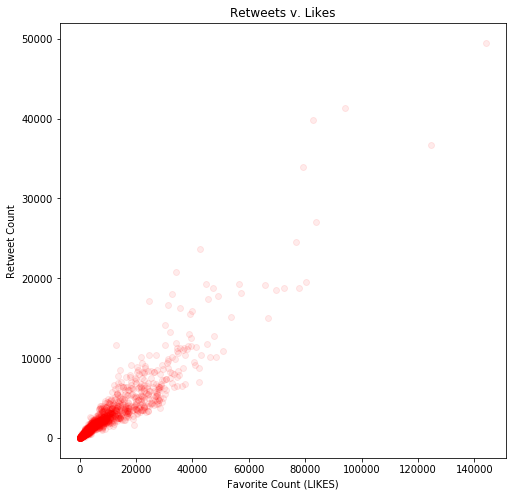

In [10]:
plt.figure(figsize=(8,8));
plt.plot(tt_final['favorite_count'], tt_final['retweet_count'], 'ro', alpha = 0.08)
plt.xlabel('Favorite Count (LIKES)')
plt.ylabel('Retweet Count')
plt.title('Retweets v. Likes');


We see a very strong correlation between the two variables. The more a tweet is liked, the more is retweeted. However, we should not infer causation, in other words, we do not know if Likes directly drive Retweets.